# 数据测试
> 数据小测试。

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]

In [37]:
#hide
import sys
import time
# import logging
import datetime
from pathlib import Path
import numpy as np
import pandas as pd
# from mongoengine import *
from pandas.tseries.offsets import *

import plotly_express as px
import cufflinks as cf

from sklearn import preprocessing

from tqdm import tqdm_notebook as tqdm

## 数据加载

In [22]:
#collapse-hide
df = pd.read_csv('./sample_21.txt')

In [36]:
df

,time,cash_amount,comment,channel,starter_id,starter_age,starter_area,receiver_id
0,2017-12-23 00:07:36,1989200,转账,普通转账,3655,22,广东,44
1,2017-12-23 00:08:25,4802500,-,线下付款,2703,50,新疆,47
2,2017-12-23 00:12:37,3254000,-,线上付款,3476,36,安徽,92
3,2017-12-23 00:12:50,3458600,-,线下付款,6017,31,贵州,43
4,2017-12-23 00:13:21,2085400,奖金,普通转账,1904,37,云南,18
...,...,...,...,...,...,...,...,...
20016,2018-02-28 14:07:39,2515300,上次买的xx,跨境转账,304,23,美国,71
20017,2018-02-28 14:35:16,4910500,李xx给张xx的钱,普通转账,3689,32,黑龙江,55
20018,2018-02-28 14:40:07,3096400,李xx给张xx的钱,普通转账,320,35,上海,24
20019,2018-02-28 14:41:10,3661000,还给你,普通转账,3909,42,上海,90


In [ ]:
df.describe()

In [35]:
df.columns = ['time', 'cash_amount', 'comment', 'channel', 'starter_id', 'starter_age', 'starter_area', 'receiver_id']

## 特征提取

可用于构造特征的维度有：

- 交易金额；
- 交易数量；
- 发起地区；
- 年龄；
- 渠道；
- 时间；

### z-score标准化: 交易金额、年龄

In [174]:
df[['cash_amount', 'starter_age']]

,cash_amount,starter_age
0,1989200,22
1,4802500,50
2,3254000,36
3,3458600,31
4,2085400,37
...,...,...
20016,2515300,23
20017,4910500,32
20018,3096400,35
20019,3661000,42


In [175]:
z_score_scaler = preprocessing.StandardScaler()
z_score_feature = z_score_scaler.fit_transform(df[['cash_amount', 'starter_age']])

In [176]:
features = pd.DataFrame(z_score_feature, columns=['cash_amount', 'starter_age'])

In [177]:
features

,cash_amount,starter_age
0,-0.359936,-1.247867
1,1.585284,1.679835
2,0.514594,0.215984
3,0.656062,-0.306820
4,-0.293420,0.320545
...,...,...
20016,0.003829,-1.143306
20017,1.659959,-0.202259
20018,0.405623,0.111423
20019,0.796009,0.843349


### 渠道

In [178]:
ch_one_hot_enc = preprocessing.OneHotEncoder()
ch_one_hot_enc.fit(df[['channel']])
# enc.n_values_

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [179]:
ch_one_hot_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [180]:
res = ch_one_hot_enc.transform(df[['channel']]).toarray()

In [181]:
for i in range(res.shape[1]):
    features[f'ch_{i}'] = res.T[0]

In [182]:
features

,cash_amount,starter_age,ch_0,ch_1,ch_2,ch_3
0,-0.359936,-1.247867,1.0,1.0,1.0,1.0
1,1.585284,1.679835,0.0,0.0,0.0,0.0
2,0.514594,0.215984,0.0,0.0,0.0,0.0
3,0.656062,-0.306820,0.0,0.0,0.0,0.0
4,-0.293420,0.320545,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
20016,0.003829,-1.143306,0.0,0.0,0.0,0.0
20017,1.659959,-0.202259,1.0,1.0,1.0,1.0
20018,0.405623,0.111423,1.0,1.0,1.0,1.0
20019,0.796009,0.843349,1.0,1.0,1.0,1.0


### starter_area

In [183]:
area_one_hot_enc = preprocessing.OneHotEncoder()
area_one_hot_enc.fit(df[['starter_area']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [184]:
area_one_hot_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [185]:
res = area_one_hot_enc.transform(df[['starter_area']]).toarray()

In [186]:
for i in range(res.shape[1]):
    features[f'area_{i}'] = res.T[0]

In [187]:
features

,cash_amount,starter_age,ch_0,ch_1,ch_2,ch_3,area_0,area_1,area_2,area_3,...,area_11,area_12,area_13,area_14,area_15,area_16,area_17,area_18,area_19,area_20
0,-0.359936,-1.247867,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.585284,1.679835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.514594,0.215984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.656062,-0.306820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.293420,0.320545,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20016,0.003829,-1.143306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20017,1.659959,-0.202259,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20018,0.405623,0.111423,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20019,0.796009,0.843349,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 降维观察特征的有效性

In [138]:
import ipyvolume as ipv

In [188]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
res = tsne.fit_transform(features)

CPU times: user 12min 8s, sys: 208 ms, total: 12min 9s
Wall time: 1min 30s


In [189]:
df_res = pd.DataFrame(index=features.index)

for i in range(3):
    df_res[i] = res[:, i]
# df_res['id'] = face_id.iloc[0]

# df_res['species']=pd.Categorical(df_res['id']).codes
# my_color=df_res['species']
# df_res = df_res.drop('species', 1)

In [190]:
df_res.shape, df_res.head()

((20021, 3),            0          1          2
 0 -21.266399 -13.765273  -7.375733
 1 -10.692111   5.919091  -1.252444
 2   2.394222   3.398024 -17.115416
 3   6.837192   4.885947  -5.841450
 4   6.109416  -3.568460  11.899408)

In [191]:
from matplotlib import cm
import ipyvolume as ipv

colormap = cm.Spectral
# _c = [i*3 for i in pd.Categorical(df_res['id']).codes]
# color = colormap(_c)
ipv.quickscatter(df_res[0], df_res[1], df_res[2], size=1)    # , marker="sphere", color=color[:,:3]

In [192]:
features

,cash_amount,starter_age,ch_0,ch_1,ch_2,ch_3,area_0,area_1,area_2,area_3,...,area_11,area_12,area_13,area_14,area_15,area_16,area_17,area_18,area_19,area_20
0,-0.359936,-1.247867,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.585284,1.679835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.514594,0.215984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.656062,-0.306820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.293420,0.320545,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20016,0.003829,-1.143306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20017,1.659959,-0.202259,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20018,0.405623,0.111423,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20019,0.796009,0.843349,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 基于ID之间交易的特征提取

在数据从交易信息来看，没有明显的分布差别，所以在这里不予考虑。

## 基于ID的特征提取

In [196]:
res = df.groupby(['starter_id', 'receiver_id']).cash_amount.sum()
res

starter_id  receiver_id
1           8              2764000
2           9              4459800
            16             3373400
            33             4958400
            38             2779800
                            ...   
6999        93             4028400
            96             1786900
7000        47             1474800
            51             4286400
            64             3324600
Name: cash_amount, Length: 19765, dtype: int64

In [199]:
res = df.groupby(['starter_id', 'receiver_id']).cash_amount.count()
res

starter_id  receiver_id
1           8              1
2           9              1
            16             1
            33             1
            38             1
                          ..
6999        93             1
            96             1
7000        47             1
            51             1
            64             1
Name: cash_amount, Length: 19765, dtype: int64

In [197]:
_ddf = pd.DataFrame(res)

In [198]:
_ddf

cash_amount
starter_id receiver_id             
1          8                2764000
2          9                4459800
           16               3373400
           33               4958400
           38               2779800
...                             ...
6999       93               4028400
           96               1786900
7000       47               1474800
           51               4286400
           64               3324600

[19765 rows x 1 columns]

### IsolationForest方法

In [128]:
rng = np.random.RandomState(42)
 
# 构造训练样本
n_samples = features.shape[0]  #样本总数
outliers_fraction = 0.005  #异常样本比例

clf = IsolationForest(max_samples=n_samples)   # , random_state=rng, contamination=outliers_fraction
clf.fit(features)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(features)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图

In [129]:
scores_pred

array([ 0.00280087, -0.0027653 ,  0.04129726, ..., -0.07699725,
       -0.08495473,  0.04468936])

In [130]:
threshold

-0.15339534616833556

In [131]:
_df = pd.DataFrame(scores_pred)
_df

,0
0,0.002801
1,-0.002765
2,0.041297
3,0.050036
4,0.008467
...,...
20016,0.031415
20017,-0.019882
20018,-0.076997
20019,-0.084955


In [132]:
res = _df[_df[0] < threshold]

In [133]:
res

,0
102,-0.162335
263,-0.164087
418,-0.158461
486,-0.165529
489,-0.173683
...,...
18292,-0.160509
18422,-0.180727
18682,-0.163285
19558,-0.188458


In [134]:
scores_pred

array([ 0.00280087, -0.0027653 ,  0.04129726, ..., -0.07699725,
       -0.08495473,  0.04468936])

In [135]:
df.iloc[res.index]

,time,cash_amount,comment,channel,starter_id,starter_age,starter_area,receiver_id
102,2017-12-23 07:45:26,46200,-,线下付款,3317,23,上海,15
263,2017-12-23 21:33:29,4999300,-,线下付款,2393,45,上海,78
418,2017-12-24 08:52:06,4701300,王xx专用款,普通转账,5982,19,上海,4
486,2017-12-24 16:06:20,4671700,-,线上付款,1257,50,上海,51
489,2017-12-24 16:19:46,20200,-,线上付款,1411,48,上海,5
...,...,...,...,...,...,...,...,...
18292,2018-02-22 21:49:17,76800,上次买的xx,普通转账,6745,23,上海,33
18422,2018-02-23 07:12:52,610800,拿去花,普通转账,4635,50,上海,55
18682,2018-02-24 02:33:50,760200,-,线下付款,440,50,上海,45
19558,2018-02-27 01:41:51,511400,水电费,普通转账,3863,18,上海,66


In [105]:
X_train.shape

(200, 2)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
 
rng = np.random.RandomState(42)
 
# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
 
X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本
 
# fit the model
clf = IsolationForest(max_samples=n_samples)     # , random_state=rng, contamination=outliers_fraction
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [109]:
threshold

0.06794075253005803

In [110]:
scores_pred > threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [111]:
scores_pred 

array([ 0.1243845 ,  0.09394413,  0.13414021,  0.08125348,  0.1305598 ,
        0.13219798,  0.10032966,  0.09952394,  0.13183041,  0.10366906,
        0.09671288,  0.11201793,  0.13122872,  0.12678816,  0.13231108,
        0.08919725,  0.11716657,  0.10765117,  0.09367724,  0.12592231,
        0.12544385,  0.13282356,  0.10420293,  0.11719703,  0.09937399,
        0.12901684,  0.13044272,  0.10217224,  0.13372872,  0.12114372,
        0.13180826,  0.1078677 ,  0.09409679,  0.1216032 ,  0.12213901,
        0.09961319,  0.09814184,  0.05243289,  0.13307492,  0.08785414,
        0.13541614,  0.09605286,  0.1293836 ,  0.11979604,  0.13010199,
        0.12591434,  0.13475877,  0.10046603,  0.1306242 ,  0.13269044,
        0.11727693,  0.11360765,  0.13214558,  0.06865182,  0.13256865,
        0.09060819,  0.07000525,  0.13331052,  0.11464809,  0.0972258 ,
        0.11010968,  0.07319963,  0.07629798,  0.12559343,  0.13104147,
        0.11752803,  0.127146  ,  0.0929914 ,  0.13156277,  0.10

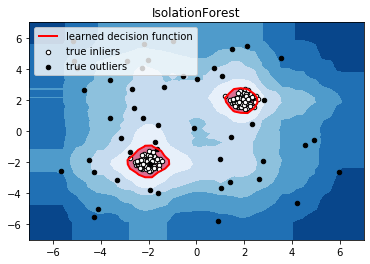

In [112]:
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()

## 数据预览

## plotly demo

In [13]:
import plotly_express as px

## Built-in sample datasets

In [14]:
# print(px.data.iris.__doc__)
iris = px.data.iris()

In [15]:
tips = px.data.tips()
gapminder = px.data.gapminder()
election = px.data.election()
wind = px.data.wind()
carshare = px.data.carshare()

In [21]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


## Scatter and Line plots

In [16]:
iris.shape

(150, 6)

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


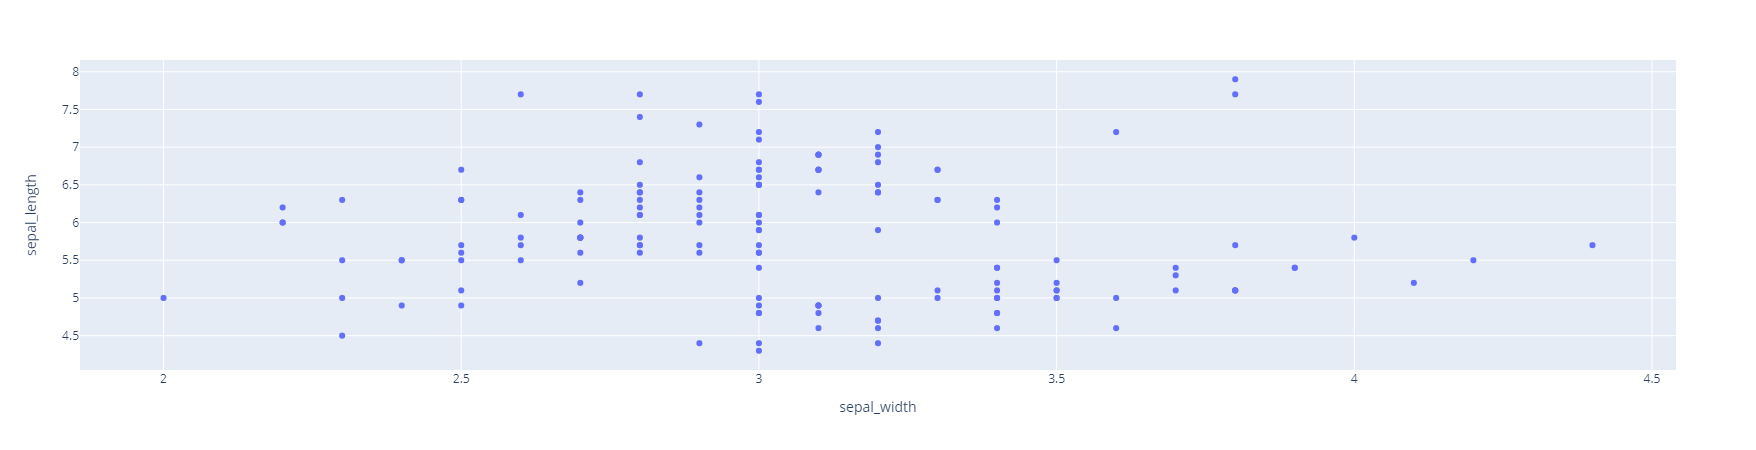

In [18]:
px.scatter(iris, x="sepal_width", y="sepal_length")

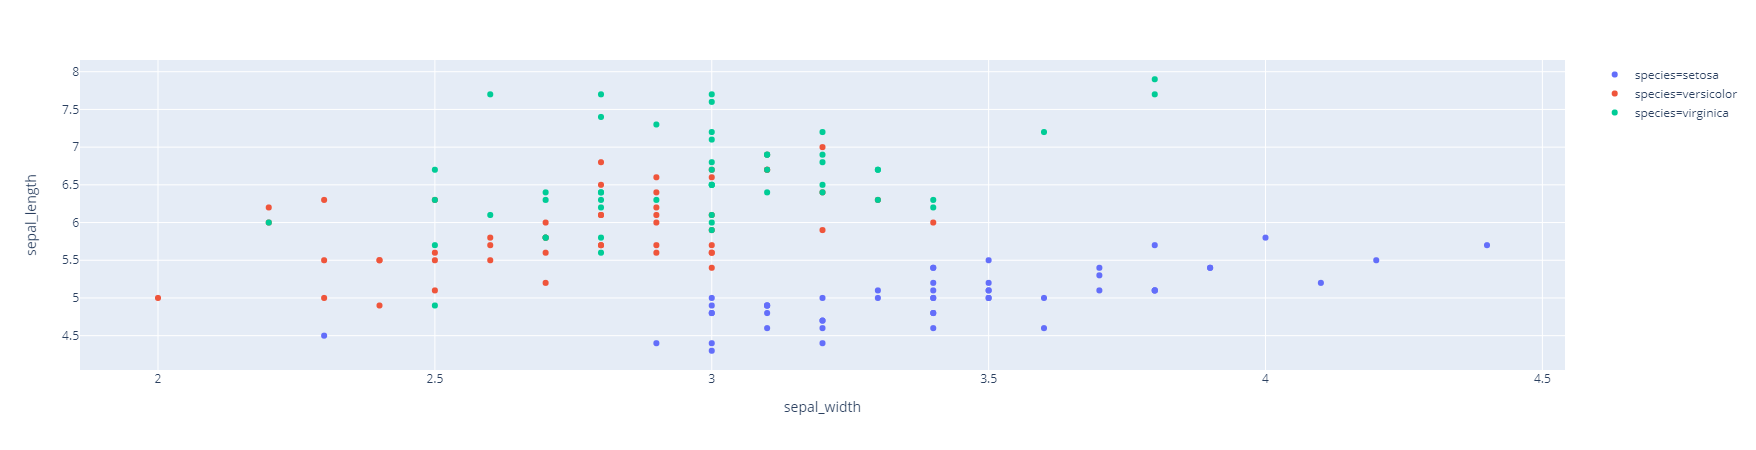

In [19]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species")

# About

This notebook is a demonstration of some of capabilities of [fastpages](https://github.com/fastai/fastpages) with notebooks.


With `fastpages` you can save your jupyter notebooks into the `_notebooks` folder at the root of your repository, and they will be automatically be converted to Jekyll compliant blog posts!


## Front Matter

The first cell in your Jupyter Notebook or markdown blog post contains front matter. Front matter is metadata that can turn on/off options in your Notebook. It is formatted like this:

```
# "My Title"
> "Awesome summary"

- toc: true- branch: master- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

The title and description need to be enclosed in double quotes only if they include special characters such as a colon. More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

## Markdown Shortcuts

A `#hide` comment at the top of any code cell will hide **both the input and output** of that cell in your blog post.

A `#hide_input` comment at the top of any code cell will **only hide the input** of that cell.

In [2]:
#hide_input
print('The comment #hide_input was used to hide the code that produced this.')

The comment #hide_input was used to hide the code that produced this.


put a `#collapse-hide` flag at the top of any cell if you want to **hide** that cell by default, but give the reader the option to show it:

In [6]:
#collapse-hide
import pandas as pd
import altair as alt

put a `#collapse-show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

In [7]:
#collapse-show
cars = 'https://vega.github.io/vega-datasets/data/cars.json'
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
sp500 = 'https://vega.github.io/vega-datasets/data/sp500.csv'
stocks = 'https://vega.github.io/vega-datasets/data/stocks.csv'
flights = 'https://vega.github.io/vega-datasets/data/flights-5k.json'

## Interactive Charts With Altair

Charts made with Altair remain interactive.  Example charts taken from [this repo](https://github.com/uwdata/visualization-curriculum), specifically [this notebook](https://github.com/uwdata/visualization-curriculum/blob/master/altair_interaction.ipynb).

In [8]:
# hide
df = pd.read_json(movies) # load movies data
genres = df['Major_Genre'].unique() # get unique field values
genres = list(filter(lambda d: d is not None, genres)) # filter out None values
genres.sort() # sort alphabetically

In [9]:
#hide
mpaa = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Not Rated']

### Example 1: DropDown

In [10]:
# single-value selection over [Major_Genre, MPAA_Rating] pairs
# use specific hard-wired values as the initial selected values
selection = alt.selection_single(
    name='Select',
    fields=['Major_Genre', 'MPAA_Rating'],
    init={'Major_Genre': 'Drama', 'MPAA_Rating': 'R'},
    bind={'Major_Genre': alt.binding_select(options=genres), 'MPAA_Rating': alt.binding_radio(options=mpaa)}
)
  
# scatter plot, modify opacity based on selection
alt.Chart(movies).mark_circle().add_selection(
    selection
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y='IMDB_Rating:Q',
    tooltip='Title:N',
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.05))
)

alt.Chart(...)

### Example 2: Tooltips

In [6]:
alt.Chart(movies).mark_circle().add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y=alt.Y('IMDB_Rating:Q', axis=alt.Axis(minExtent=30)), # use min extent to stabilize axis title placement
    tooltip=['Title:N', 'Release_Date:N', 'IMDB_Rating:Q', 'Rotten_Tomatoes_Rating:Q']
).properties(
    width=600,
    height=400
)

alt.Chart(...)

### Example 3: More Tooltips

In [7]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q', scale=alt.Scale(type='log')),
    alt.Color('symbol:N')
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),
    
    data=stocks
).properties(
    width=700,
    height=400
)

alt.LayerChart(...)

## Data Tables

You can display tables per the usual way in your blog:

In [11]:
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
df = pd.read_json(movies)
# display table with pandas
df[['Title', 'Worldwide_Gross', 
    'Production_Budget', 'Distributor', 'MPAA_Rating', 'IMDB_Rating', 'Rotten_Tomatoes_Rating']].head()

,Title,Worldwide_Gross,Production_Budget,Distributor,MPAA_Rating,IMDB_Rating,Rotten_Tomatoes_Rating
0,The Land Girls,146083.0,8000000.0,Gramercy,R,6.1,NaN
1,"First Love, Last Rites",10876.0,300000.0,Strand,R,6.9,NaN
2,I Married a Strange Person,203134.0,250000.0,Lionsgate,None,6.8,NaN
3,Let's Talk About Sex,373615.0,300000.0,Fine Line,None,NaN,13.0
4,Slam,1087521.0,1000000.0,Trimark,R,3.4,62.0


## Images

### Local Images

You can reference local images and they will be copied and rendered on your blog automatically.  You can include these with the following markdown syntax:

`![](my_icons/fastai_logo.png)`

![](my_icons/fastai_logo.png)

### Remote Images

Remote images can be included with the following markdown syntax:

`![](https://image.flaticon.com/icons/svg/36/36686.svg)`

![](https://image.flaticon.com/icons/svg/36/36686.svg)

### Animated Gifs

Animated Gifs work, too!

`![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)`

![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)

### Captions

You can include captions with markdown images like this:

```
![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")
```


![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")





# Other Elements

## Tweetcards

Typing `> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20` will render this:

> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20

## Youtube Videos

Typing `> youtube: https://youtu.be/XfoYk_Z5AkI` will render this:


> youtube: https://youtu.be/XfoYk_Z5AkI

## Boxes / Callouts 

Typing `> Warning: There will be no second warning!` will render this:


> Warning: There will be no second warning!



Typing `> Important: Pay attention! It's important.` will render this:

> Important: Pay attention! It's important.



Typing `> Tip: This is my tip.` will render this:

> Tip: This is my tip.



Typing `> Note: Take note of this.` will render this:

> Note: Take note of this.



Typing `> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.` will render in the docs:

> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.

## Footnotes

You can have footnotes in notebooks, however the syntax is different compared to markdown documents. [This guide provides more detail about this syntax](https://github.com/fastai/fastpages/blob/master/_fastpages_docs/NOTEBOOK_FOOTNOTES.md), which looks like this:

```
{% raw %}For example, here is a footnote {% fn 1 %}.
And another {% fn 2 %}
{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}{% endraw %}
```

For example, here is a footnote {% fn 1 %}.

And another {% fn 2 %}

{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}